In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
def plot_logo(x, y, image, ax, zoom=1):
    '''Help function for plotting logos on ax'''
    image = plt.imread(image)
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

# Stemwijzer
Data van de stemwijzer voor de Tweede Kamer verkiezingen.

Codering:
- `1`: `Eens`
- `0`: `Neutraal`
- `-1`: `Oneens`

In [3]:
stemwijzer = pd.read_csv('data/stemwijzer.csv', index_col=0).transpose()
parties = stemwijzer.index
stemwijzer

,vaccinatiebewijs,verhogen defensiebudget,gratis kinderopvang,nederland uit eu,rekeningrijden,vuurwerk toestaan,vleesbelasting,bezuinigen publieke omroep,zorgfonds,verbod gezichtsbedekkende kleding,...,inburgering op locatie,legaliseren softdrugs,nederlandstalig hoger onderwijs,voltooid leven,koppeling minimumloon en bijstand,sociale huurwoningen,geen nieuwe beperkingen voor boerenbedrijven,middenschool,vluchtelingen opnemen,mondkapjesplicht
vvd,1,1,-1,-1,0,1,1,-1,-1,1,...,1,0,1,1,1,-1,1,-1,-1,1
pvv,-1,1,-1,1,-1,1,-1,1,0,1,...,1,-1,1,0,1,1,1,-1,-1,1
cda,-1,1,1,-1,-1,1,-1,-1,-1,1,...,1,-1,1,-1,-1,-1,1,1,-1,1
d66,1,1,1,-1,1,1,1,-1,-1,-1,...,-1,1,1,1,-1,-1,-1,1,1,1
groenlinks,-1,-1,1,-1,1,-1,1,-1,1,-1,...,-1,1,1,1,-1,1,-1,1,1,1
sp,-1,-1,1,-1,-1,1,-1,-1,1,1,...,-1,1,0,-1,-1,1,-1,1,1,1
pvda,-1,1,1,-1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,1,1
cu,-1,1,0,-1,1,-1,1,-1,-1,1,...,1,-1,1,-1,-1,1,0,-1,1,1
pvdd,-1,-1,1,-1,1,-1,1,-1,1,1,...,-1,1,1,1,-1,1,-1,1,1,-1
50plus,1,1,1,-1,1,-1,-1,-1,-1,1,...,1,1,1,1,1,1,-1,1,-1,1


## Correlation

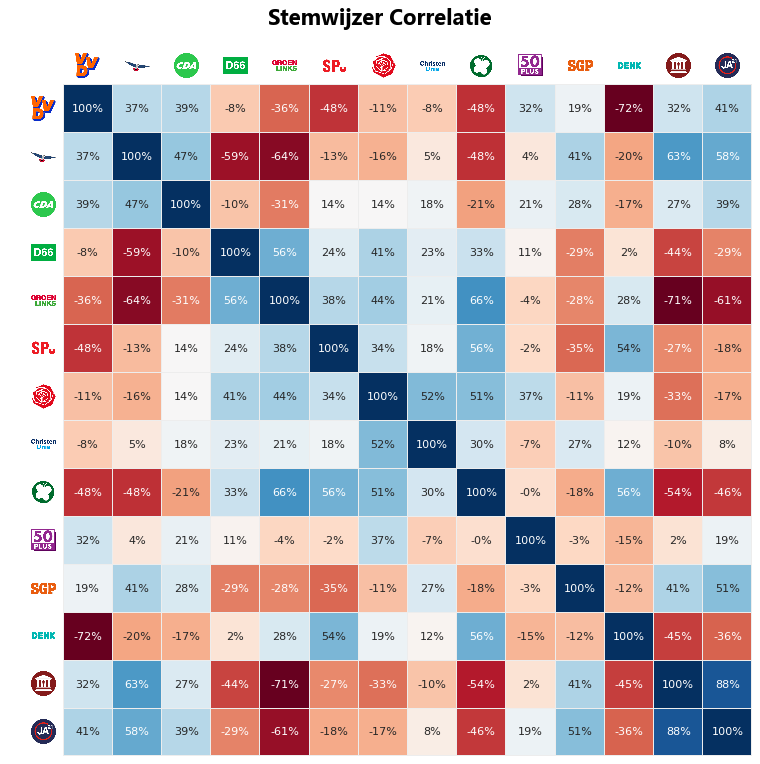

In [4]:
fig, ax = plt.subplots(figsize=(12,12), dpi=80, facecolor='white')

# Correlation between parties
correlation = stemwijzer.T.corr()

# Custom annotation
annot = correlation.apply(lambda s: s.apply(lambda x: '{:.0%}'.format(x)))

# Plot heatmap
g = sns.heatmap(correlation, ax=ax, cmap='RdBu', cbar=False,
                linecolor='#ededed', linewidths=.005,
                annot=annot, fmt='', annot_kws={'fontsize': 10})

# Plot logos
for pos, party in enumerate(parties):
    plot_logo(pos+0.5, -.4, f"logos/{party}.png", ax=ax, zoom=.1)
    plot_logo(-0.4, pos+0.5, f"logos/{party}.png", ax=ax, zoom=.1)

# Set titles
g.set_title('Stemwijzer Correlatie', fontsize=20, fontweight='bold', fontname='segoe ui')
g.set_xticklabels([])
g.set_yticklabels([])

# Move axis to top and remove ticks
g.xaxis.set_ticks_position('top')
g.tick_params(axis='both', which='both', length=0)

fig.savefig('figures/political_correlation.png', dpi=300, bbox_inches='tight')

## Principal Component Analysis

In [5]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(stemwijzer)
print(pca.explained_variance_ratio_)

[0.41380116 0.1448218 ]


In [6]:
pc_1 = principal_components[:, 0]
pc_2 = -principal_components[:, 1]

x_min, x_max = pc_1.min(), pc_1.max()
y_min, y_max = pc_2.min(), pc_2.max()

In [7]:
pc_features = pd.DataFrame(pca.components_, columns=stemwijzer.columns, index=['pc1', 'pc2']).transpose()
pc_features

,pc1,pc2
vaccinatiebewijs,0.008754,-0.339486
verhogen defensiebudget,0.198629,-0.214190
gratis kinderopvang,-0.224241,-0.134326
nederland uit eu,0.113949,0.091697
rekeningrijden,-0.156351,-0.109679
vuurwerk toestaan,0.165889,-0.041160
vleesbelasting,-0.127609,-0.207074
bezuinigen publieke omroep,0.165498,0.317047
zorgfonds,-0.173633,0.238177
verbod gezichtsbedekkende kleding,0.143159,-0.009353


In [8]:
features_ordered = pd.DataFrame()
for pc in pc_features.columns:
    features_ordered[pc] = pc_features[pc].sort_values(ascending=False).index
features_ordered

,pc1,pc2
0,vaker gevangenisstaffen ipv taakstraffen,belastingvoordeel huishoudens
1,geen nieuwe beperkingen voor boerenbedrijven,bezuinigen publieke omroep
2,kerncentrale,zorgfonds
3,koppeling minimumloon en bijstand,sociale huurwoningen
4,inburgering op locatie,salaris basisschool gelijk aan middelbareschool
5,verhogen defensiebudget,correctief referendum
6,vuurwerk toestaan,nederland uit eu
7,bezuinigen publieke omroep,excuses slavenhandel
8,verbod gezichtsbedekkende kleding,vluchtelingen opnemen
9,nederland uit eu,geen nieuwe beperkingen voor boerenbedrijven


## Political Spectrum (1D)

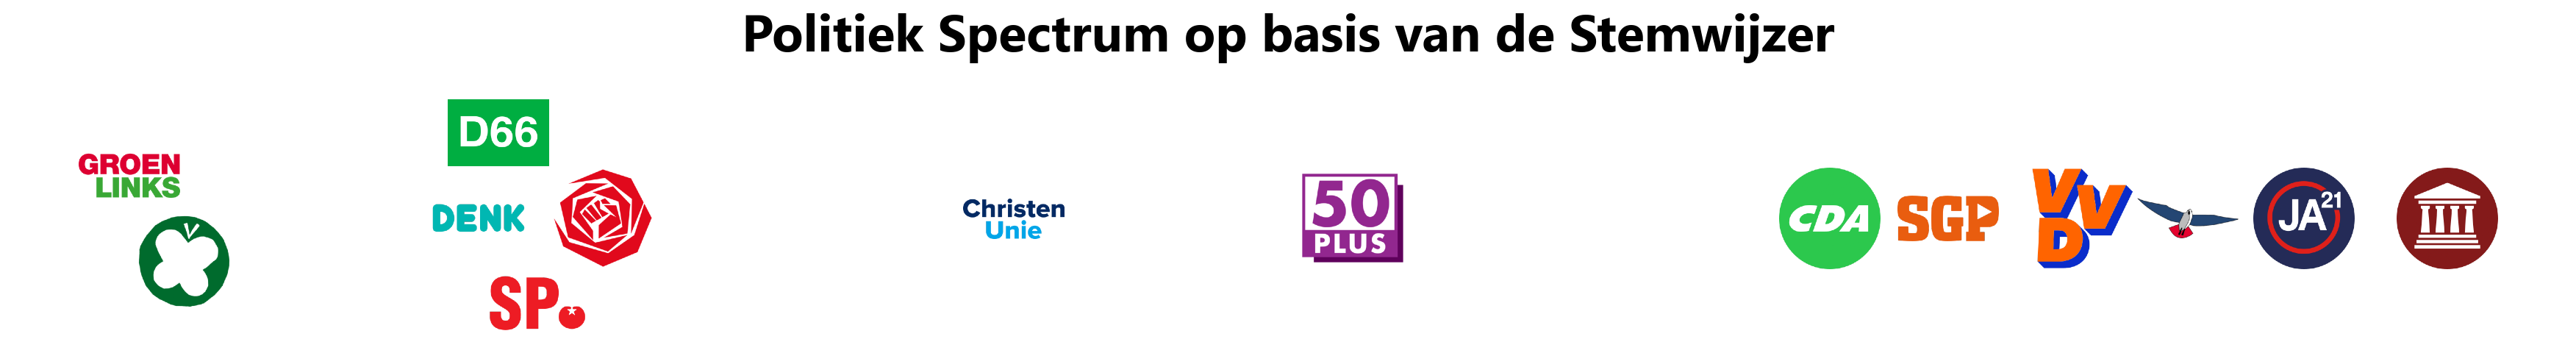

In [9]:
fig, ax = plt.subplots(figsize=(20,2), dpi=180, facecolor='white')

# Layout
fig.tight_layout()
ax.set_axis_off()

# Plot title
ax.set_title('Politiek Spectrum op basis van de Stemwijzer', pad=40,
             fontsize=28, fontweight='bold', fontname='segoe ui')

# Plot logos
y_pos = [0, 0, 0, 1, .5, -1, 0, 0, -.5, 0, 0, 0, 0, 0]  # y nudges
for x, y, party in zip(pc_1, y_pos, parties):
    plot_logo(x, y, f"logos/{party}.png", ax=ax, zoom=.25)

fig.savefig('figures/political_spectrum.png', dpi=300, bbox_inches='tight')

## Political Compass (2D)

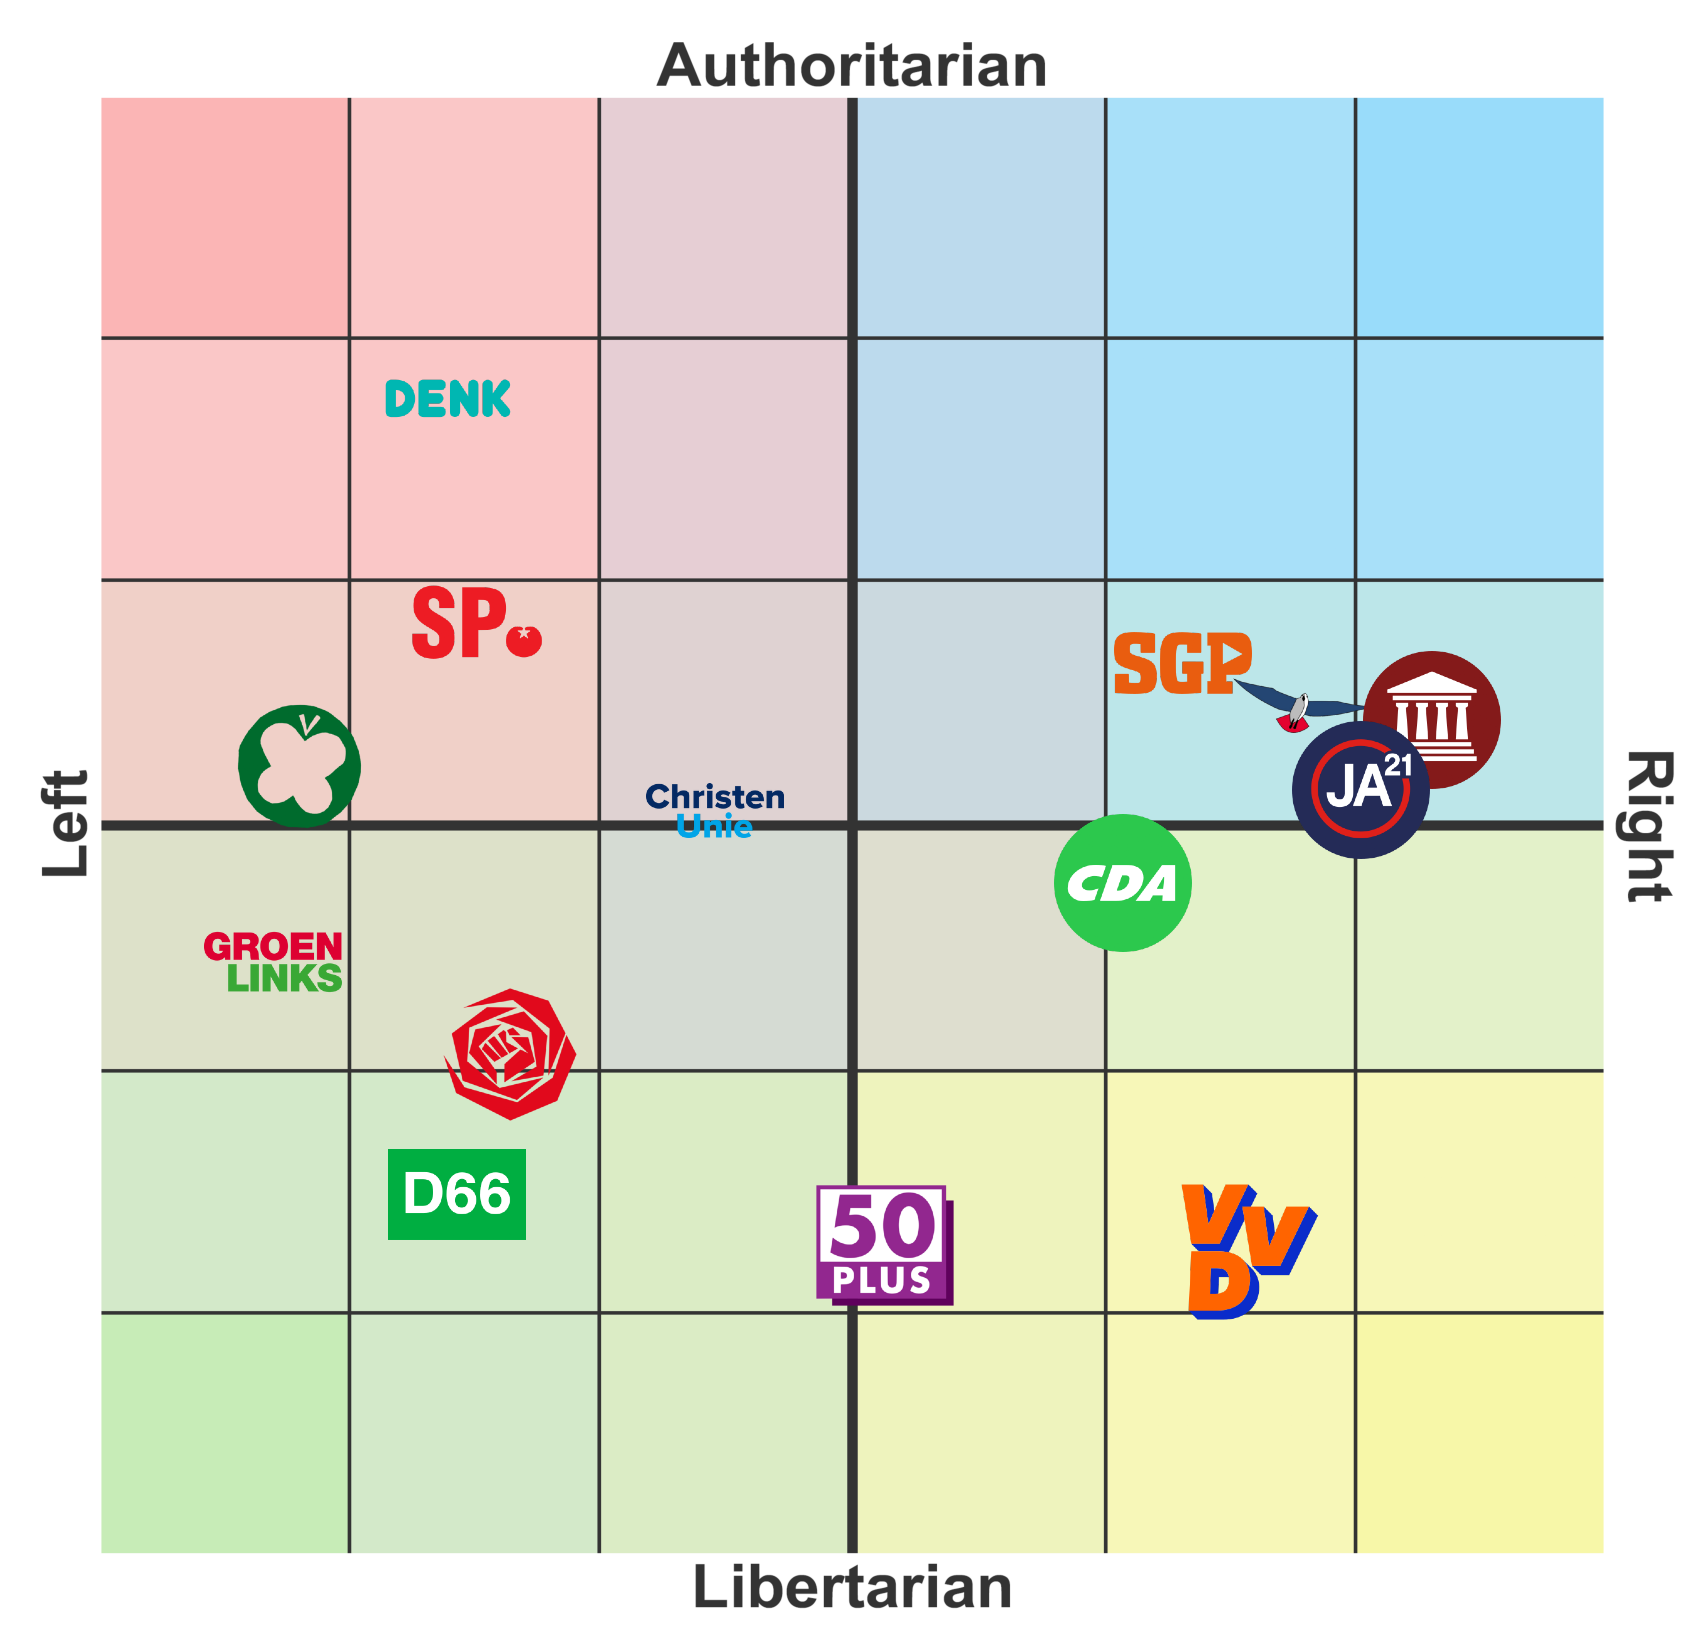

In [10]:
fig, ax = plt.subplots(figsize=(10,10), dpi=180, facecolor='white')

# Layout
fig.tight_layout()
ax.set_axis_off()

# Plot political compass template
img = plt.imread('logos/political_compass_template.png')
ax.imshow(img, extent=[x_min-2, x_max+2, y_max+3, y_min-3], alpha=.8)

for x, y, party in zip(pc_1, pc_2, parties):
    plot_logo(x, y, f"logos/{party}.png", ax=ax, zoom=.25)

fig.savefig('figures/political_compass.png', dpi=300, bbox_inches='tight')